# INTERN NAME:- MAREPALLY SHREYA REDDY

Objective: Create a hybrid model for stock price/performance prediction
using numerical analysis of historical stock prices, and sentimental analysis of
news headlines 

In [1]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In C:\Users\shreya\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\shreya\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\shreya\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\shreya\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\shreya\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
Data =yf.download("^BSESN", start = '2001-01-01', end='2020-06-30')

[*********************100%***********************]  1 of 1 completed


In [4]:
Data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0


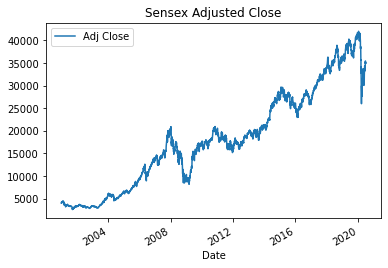

In [5]:
Data[['Adj Close']].plot()
plt.title("Sensex Adjusted Close")
plt.show()

In [6]:
Data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
Data.reset_index(level=0, inplace=True)

In [8]:
Data['Date'].dt.year.value_counts()

2004    251
2010    250
2002    250
2003    250
2005    248
2017    248
2007    248
2006    247
2013    247
2001    247
2018    246
2011    246
2015    245
2016    245
2012    245
2008    244
2019    241
2014    240
2009    236
2020    120
Name: Date, dtype: int64

In [9]:
Data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
train_data, test_data = Data[0:int(len(Data)*0.8)], Data[int(len(Data)*0.8):]


In [11]:
train_data.shape, test_data.shape

((3835, 7), (959, 7))

In [12]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
adfuller(train_data['Adj Close'])

(-0.25672848857538877,
 0.9314132169051643,
 5,
 3829,
 {'1%': -3.4320589812823554,
  '5%': -2.8622951341088414,
  '10%': -2.5671719675142097},
 51289.78163939323)

p value of 0.93 indicates that we have to accept our null hypothesis of data being non-stationary

In [13]:
trainS=log(train_data['Adj Close']).diff()
adfuller(trainS[1:])

(-44.48664146328348,
 0.0,
 1,
 3832,
 {'1%': -3.4320576424555265,
  '5%': -2.862294542701668,
  '10%': -2.5671716526716017},
 -21199.27778221434)

In [14]:
testS=log(test_data['Adj Close']).diff()
adfuller(testS[1:])

(-7.703185094175256,
 1.3225714813379841e-11,
 13,
 944,
 {'1%': -3.4372961556318304,
  '5%': -2.864606557310281,
  '10%': -2.568402813173298},
 -5661.544647453682)

<AxesSubplot:>

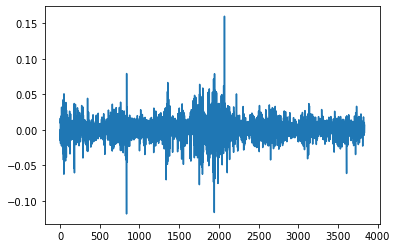

In [15]:
trainS.plot()

In [16]:
pip install pyramid

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [18]:
from pmdarima.arima import auto_arima

In [19]:
arima_model=auto_arima(trainS[1:],start_p=1,start_q=1,max_p=5,max_q=5,trace=True,error_action='warn',suppress_warnings=True,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-21373.803, Time=3.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-21342.991, Time=0.71 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-21367.310, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-21370.367, Time=3.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-21340.564, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-21377.882, Time=4.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-21378.879, Time=0.94 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-21377.769, Time=1.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-21375.768, Time=2.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-21376.666, Time=0.51 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 17.816 seconds


In [20]:
train_ar = trainS[1:].values
test_ar = testS[1:].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
print('Testing Mean Squared Error: %.5f' % mean_squared_error(test_ar, predictions))
print('Testing Mean Absolute Error: %.5f' % mean_absolute_error(test_ar, predictions))

<class 'list'>


C:\Users\shreya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error: 0.00015
Testing Mean Absolute Error: 0.00723


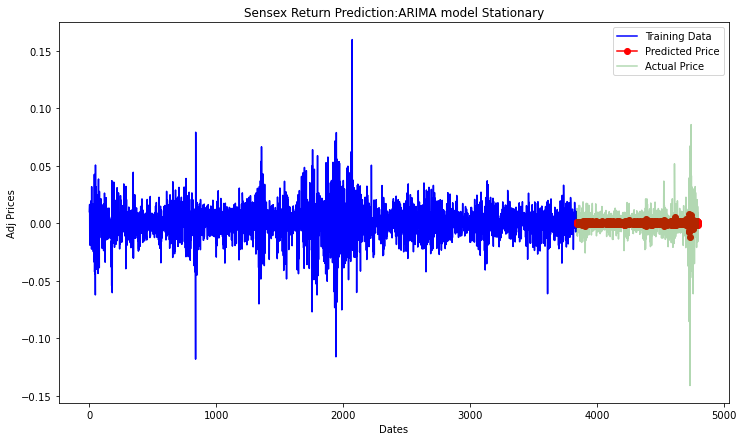

In [79]:
plt.figure(figsize=(12,7))
plt.plot(trainS[1:], 'green', color='blue', label='Training Data')
plt.plot(test_data.index[1:],predictions, color='red', marker='o',
         label='Predicted Price')
plt.plot(test_data.index[1:], testS[1:].values, color='green', label='Actual Price',alpha=0.3)
plt.title('Sensex Return Prediction:ARIMA model Stationary')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [23]:
testS[3835]=np.log(test_data['Adj Close'][3835])
ArimaModel=pd.DataFrame(np.exp(testS.cumsum()))
ArimaModel.rename(columns={'Adj Close': 'Y_Test'},inplace=True)
PredictedValue=[x.tolist() for x in predictions]
PredictedValue=[val for sublist in PredictedValue for val in sublist]
PredictedValue.insert(0,np.log(test_data['Adj Close'][3835]))
ArimaModel['ARIMA_Prediction']=PredictedValue
ArimaModel['ARIMA_Prediction']=pd.DataFrame(np.exp(ArimaModel['ARIMA_Prediction'].cumsum()))
ArimaModel.drop(ArimaModel.head(1).index, inplace=True)

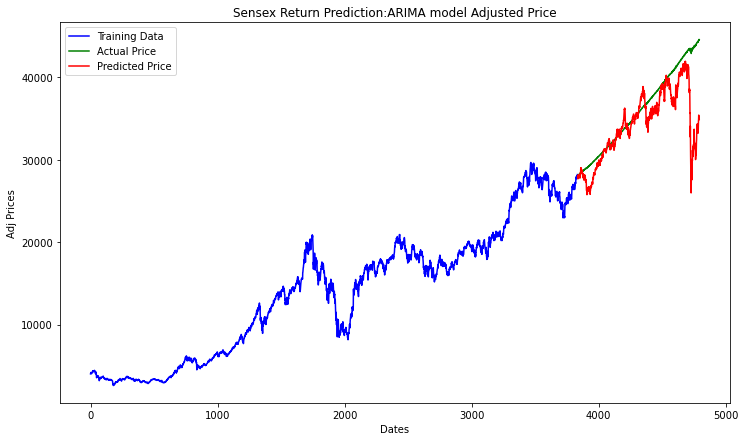

In [80]:
plt.figure(figsize=(12,7))
plt.plot(train_data['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index[1:],ArimaModel['ARIMA_Prediction'], color='green', label='Actual Price')
plt.plot(test_data.index[1:], ArimaModel['Y_Test'].values, color='red', label='Predicted Price')
plt.title('Sensex Return Prediction:ARIMA model Adjusted Price')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [26]:
ArimaModel.head(5)

,Y_Test,ARIMA_Prediction
3836,28003.119141,28078.987602
3837,27981.710937,28077.617222
3838,27697.509766,28092.483080
3839,27714.369141,28082.403963
3840,28078.349609,28114.724516


In [27]:
print('RMSE: %.2f' % np.sqrt(mean_squared_error(ArimaModel['Y_Test'], ArimaModel['ARIMA_Prediction'])))

RMSE: 3735.14


In [28]:
print('MAE: %.2f' % mean_absolute_error(ArimaModel['Y_Test'], ArimaModel['ARIMA_Prediction']))

MAE: 2110.99


In [29]:
ArimaModel['ARIMA_Prediction'].to_csv('ArimaPrediction.csv')

 Sentiment Analysis & Hybrid Model

In [31]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', None)
import yfinance as yf
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
news_data=pd.read_csv('india-news-headlines.csv')

In [33]:
news_data.shape

(3297172, 3)

In [34]:
news_data.head(30)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating undertaker bigger roman reigns
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; says Vajpayee
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [35]:
news_data.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [36]:
news_data['publish_date'] = pd.to_datetime(news_data.publish_date,format='%Y%m%d')

In [37]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
def NewsHeadlinesPreprocessing(headline):
    temp=re.sub(r"http\S+","",headline) #removes hyperlinks
    temp=re.sub(r"[^a-zA-Z0-9]$","",temp) #subtitute special charaters in the end with nothing
    temp=re.sub(r"[^a-zA-Z0-9]"," ",temp) #subtitute special charaters in the middle with space
    temp=re.sub(' {2,}', ' ',temp) #subtitiute more than two spaces with a single space
    temp=temp.lower() # convert all text to lowercase
    tokens=[w for w in temp.split() if  w not in stopwords] #stopwords removal
    finalString=''
    for i in tokens:
        lemmatized_string=lemmatizer.lemmatize(i) #lemmatisation for reducing each token to its lemma/root form
        if(len(lemmatized_string)>2):
            finalString=finalString+lemmatized_string+' '
    return finalString

In [38]:
clean_headline_text=[]
for i in news_data['headline_text']:
    clean_headline_text.append(NewsHeadlinesPreprocessing(i))
news_data['clean_headline_text']=clean_headline_text

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [40]:
sia = SIA()
Sentiment_Results = []
for news in news_data['clean_headline_text']:
    Sentiment_Results.append(sia.polarity_scores(news))
Sentiment_Results=pd.DataFrame(Sentiment_Results)
Processed_NewsData=pd.concat([news_data, Sentiment_Results], axis=1)

In [41]:
Aggregate_NewsData=Processed_NewsData.groupby('publish_date')[['neg','neu','pos','compound']].agg('sum').reset_index()
Aggregate_count=pd.DataFrame(Processed_NewsData["publish_date"].value_counts().reset_index())
Aggregate_count.columns = ['publish_date', 'count']
Aggregate_NewsData.columns =['publish_date','Total Negative','Total Neutral','Total Positive','Total Compound']
Aggregate_NewsData=pd.merge(Aggregate_NewsData,Aggregate_count,on='publish_date',how='left')

In [42]:
X=pd.merge(Data[['Date','Adj Close']], Aggregate_NewsData, how='left', left_on='Date', right_on='publish_date')
del X['publish_date']

In [43]:
X.dropna(subset=['count'],inplace=True)

In [44]:
X['count']= X['count'].apply(np.int64)

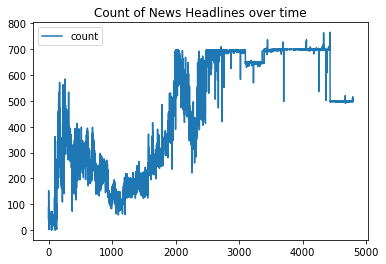

In [45]:
X[['count']].plot()
plt.title("Count of News Headlines over time")
plt.show()

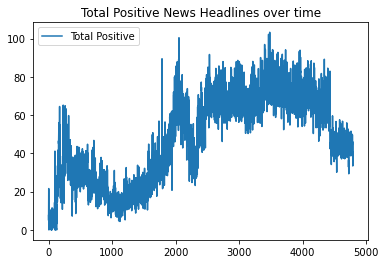

In [46]:
X[['Total Positive']].plot()
plt.title("Total Positive News Headlines over time")
plt.show()

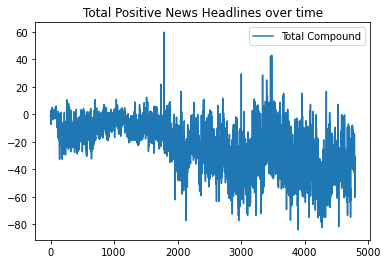

In [47]:
X[['Total Compound']].plot()
plt.title("Total Positive News Headlines over time")
plt.show()

<AxesSubplot:xlabel='Adj Close', ylabel='count'>

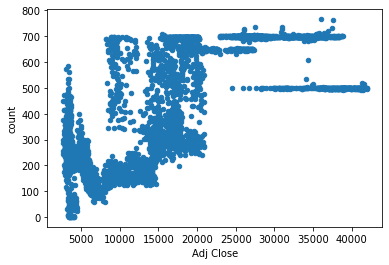

In [48]:
X.plot.scatter('Adj Close','count')

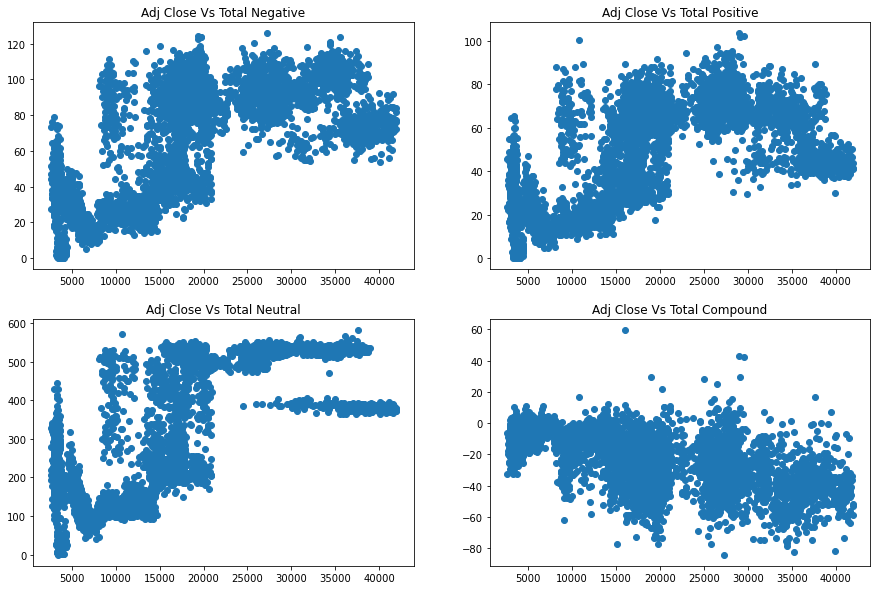

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2,figsize=(15,10))


ax[0, 0].scatter(X['Adj Close'],X['Total Negative'])
ax[1, 0].scatter(X['Adj Close'],X['Total Neutral'])
ax[0, 1].scatter(X['Adj Close'],X['Total Positive'])
ax[1, 1].scatter(X['Adj Close'],X['Total Compound'])
ax[0, 0].set_title('Adj Close Vs Total Negative')
ax[1, 0].set_title('Adj Close Vs Total Neutral')
ax[0, 1].set_title('Adj Close Vs Total Positive')
ax[1, 1].set_title('Adj Close Vs Total Compound')

plt.show()

<AxesSubplot:>

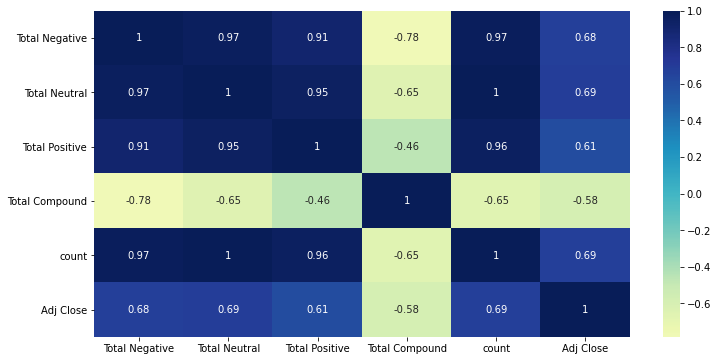

In [50]:
Numerical_Columns=['Total Negative','Total Neutral','Total Positive','Total Compound','count','Adj Close']
plt.figure(figsize=(12, 6))
sns.heatmap(X[Numerical_Columns].corr(), annot = True, center=0, cmap="YlGnBu")

<AxesSubplot:>

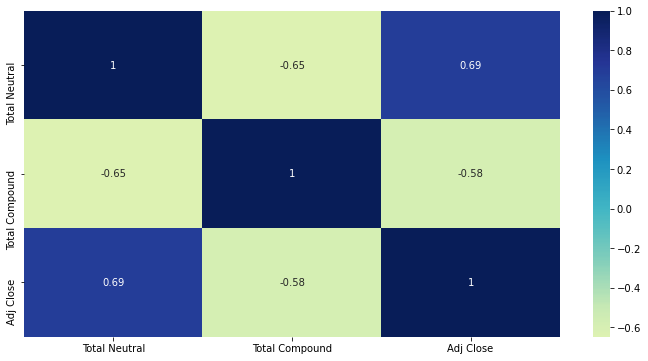

In [51]:
Numerical_Columns=['Total Neutral','Total Compound','Adj Close']
plt.figure(figsize=(12, 6))
sns.heatmap(X[Numerical_Columns].corr(), annot = True, center=0, cmap="YlGnBu")

In [56]:
x_train, x_test = X[0:int(len(Data)*0.8)][['Total Neutral','Total Compound']], X[int(len(Data)*0.8)+1:][['Total Neutral','Total Compound']]
y_train, y_test = X[0:int(len(Data)*0.8)][['Adj Close']], X[int(len(Data)*0.8)+1:][['Adj Close']]

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Cols=x_train.columns
x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=Cols)
x_train_scaled.head(5)

,Total Neutral,Total Compound
0,0.120148,0.552924
1,0.053980,0.558408
2,0.215713,0.579286
3,0.152332,0.584688
4,0.092030,0.547263


In [58]:
x_test_scaled=scaler.fit_transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=Cols)
x_test_scaled.head(5)

,Total Neutral,Total Compound
0,0.720830,0.609042
1,0.730202,0.539740
2,0.796328,0.639907
3,0.746981,0.388650
4,0.679836,0.536815


In [59]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [60]:
ModelLR=LR()
ModelLR.fit(x_train_scaled, y_train)
preds_val = ModelLR.predict(x_test_scaled)
np.sqrt(mean_squared_error(y_test, preds_val))

23827.824867528885

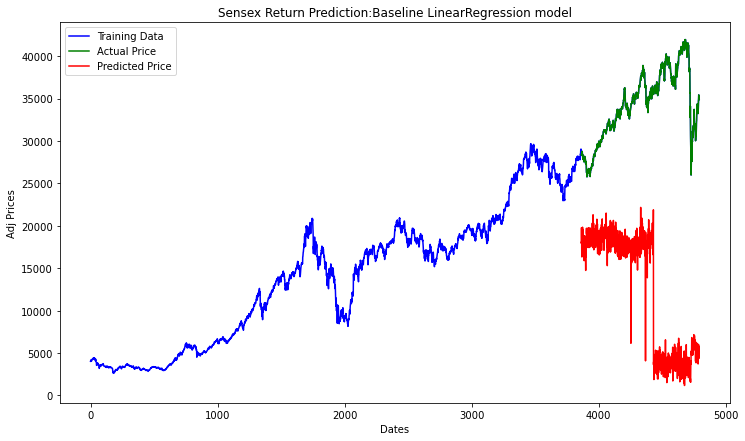

In [62]:
plt.figure(figsize=(12,7))
plt.plot(X['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(x_test.index[:],y_test, color='green', label='Actual Price')
plt.plot(x_test.index[:], preds_val, color='red', label='Predicted Price')
plt.title('Sensex Return Prediction:Baseline LinearRegression model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [63]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [64]:
ModelDTR=DTR()
ModelDTR.fit(x_train, y_train)
preds_val = ModelLR.predict(x_test)
np.sqrt(mean_squared_error(y_test, preds_val))

9826231.865996221

In [65]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [2, 10, 20, 30, 40],
              "max_depth": [4, 6, 8, 10, 12],
              "min_samples_leaf": [8, 16, 32, 64, 128],
              "max_leaf_nodes": [8, 16, 32, 64, 128],
              }
preds_val = RandomizedSearchCV(DTR(),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         n_iter=90)

search = preds_val.fit(x_train, y_train)

search.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 128,
 'max_leaf_nodes': 64,
 'max_depth': 8,
 'criterion': 'mse'}

In [66]:
optimal_params = {'min_samples_split': 30,
 'min_samples_leaf': 8,
 'max_leaf_nodes': 16,
 'max_depth': 12,
 'criterion': 'mse'}
ModelDTRBest=DTR(**optimal_params)
ModelDTRBest.fit(x_train, y_train)
preds_val = ModelDTRBest.predict(x_test)
np.sqrt(mean_squared_error(y_test, preds_val))

16193.057332152484

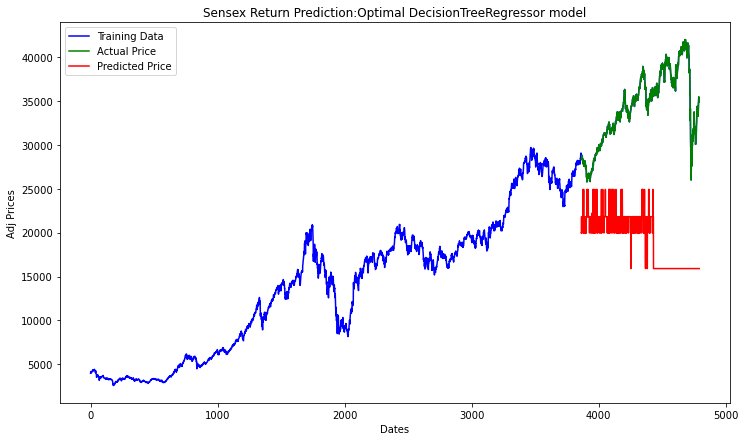

In [68]:
plt.figure(figsize=(12,7))
plt.plot(X['Adj Close'], 'green', color='blue', label='Training Data')
plt.plot(x_test.index[:],y_test, color='green', label='Actual Price')
plt.plot(x_test.index[:], preds_val, color='red', label='Predicted Price')
plt.title('Sensex Return Prediction:Optimal DecisionTreeRegressor model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.legend()

In [69]:
ArimaPrediction=pd.read_csv('ArimaPrediction.csv')
ArimaPrediction.rename(columns={'Unnamed: 0': 'Index'},inplace=True)

In [70]:
ArimaPrediction.set_index('Index',inplace=True)

In [71]:
ArimaPrediction.head(5)

,ARIMA_Prediction
Index,
3836,28078.987602
3837,28077.617222
3838,28092.483080
3839,28082.403963
3840,28114.724516


In [72]:
Hybrid_Prediction=pd.DataFrame(y_test)
Hybrid_Prediction.rename(columns={'Adj Close': 'Y_Test'},inplace=True)
y_test.shape,preds_val.shape
Hybrid_Prediction['DTPrediction']=preds_val
Hybrid_Prediction=Hybrid_Prediction.join(ArimaPrediction['ARIMA_Prediction'])
Hybrid_Prediction.head(5)

,Y_Test,DTPrediction,ARIMA_Prediction
3864,28353.539062,19952.826647,28464.329407
3865,28372.230469,19952.826647,28454.177631
3866,28412.890625,21807.933428,28496.377509
3867,28599.029297,21807.933428,28512.894411
3868,28634.500000,19952.826647,28540.915942


In [73]:
def FinalPrediction(ratio,Hybrid_Prediction):
    PredFinal=ratio*Hybrid_Prediction['ARIMA_Prediction']+(1-ratio)*Hybrid_Prediction['DTPrediction']
    return PredFinal

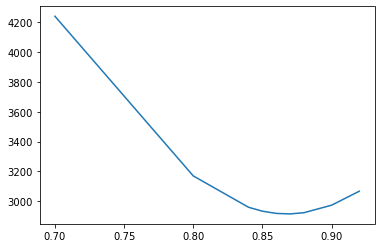

In [74]:
ratio_list=[.70,.80,.84,.85,.86,.87,.88,.90,.92]
list=[]
for ratio in ratio_list:
    PredFinal=FinalPrediction(ratio,Hybrid_Prediction)
    list.append(np.sqrt(mean_squared_error(y_test,PredFinal)))
plt.plot(ratio_list,list)
plt.show()

In [75]:
PredFinal=FinalPrediction(0.87,Hybrid_Prediction)
print(np.sqrt(mean_squared_error(y_test,PredFinal)))

2914.5844404193317


In [76]:
print(mean_absolute_error(y_test,PredFinal))

1972.0837328072541


NameError: name 'Sensex_Data' is not defined

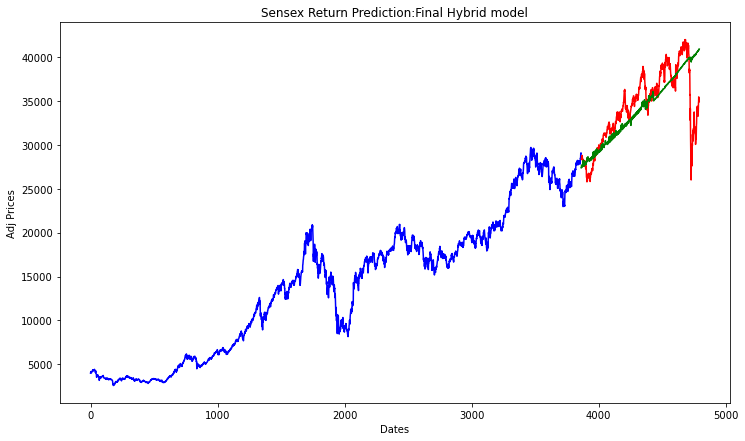

In [77]:
plt.figure(figsize=(12,7))
plt.plot(y_train, 'green', color='blue', label='Training Data')
plt.plot(y_test.index[:],y_test, color='red', label='Actual Price')
plt.plot(y_test.index[:], PredFinal, color='green', label='Predicted Price')
plt.title('Sensex Return Prediction:Final Hybrid model')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.xticks(np.arange(0,4838,300), Sensex_Data['Date'].dt.year[0:4838:300])
plt.legend()